In [30]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import glob
import os

In [31]:
%matplotlib inline

# 1d case

In [64]:
fs_IS_ID = []
fs_IS = []
fs_BDNK = []
#files = sorted(glob.glob('1d/data*hdf5'), key=os.path.getmtime)
#for f in files:
for n in range(6):
    fs_IS_ID.append(h5py.File(f'IS/Shocktube1DPara/ideal/data_serial_TIx_{n}.hdf5', 'r'))
    fs_IS.append(h5py.File(f'IS/Shocktube1DPara/bulk/zeta1em2/data_serial_TIx_{n}.hdf5', 'r'))
    fs_BDNK.append(h5py.File(f'BDNK/Shocktube1D/bulk/zeta1em2/data_serial_TIx_{n}.hdf5', 'r'))

In [55]:
# fss = [fs_IS_ID, fs_IS, fs_BDNK]
# names = ['IS Ideal','IS Bulk','BDNK Bulk']
fss = [fs_IS, fs_BDNK]
names = ['IS Bulk','BDNK Bulk']

In [56]:
# for fs in fss:
#     print(fs[0]['Auxiliary/pi11'])

In [57]:
for fs in fss:
    print(fs[0]['Domain'].attrs.keys())
    print(fs[0]['Primitive'].attrs['varOrder'])
#print(fss[0][0]['Primitive/v1'][:])


<KeysViewHDF5 ['Ng', 'Nx', 'Ny', 'Nz', 'dt', 'dx', 'dy', 'dz', 'endTime', 'nx', 'ny', 'nz', 'xmax', 'xmin', 'ymax', 'ymin', 'zmax', 'zmin']>
b'v1,v2,v3,p,rho,n,q1,q2,q3,Pi,pi11,pi12,pi13,pi22,pi23,pi33,'
<KeysViewHDF5 ['Ng', 'Nx', 'Ny', 'Nz', 'dt', 'dx', 'dy', 'dz', 'endTime', 'nx', 'ny', 'nz', 'xmax', 'xmin', 'ymax', 'ymin', 'zmax', 'zmin']>
b'v1,v2,v3,p,rho,n,'


In [58]:
for fs in fss:
    print(fs[0]['Optional'].attrs['zeta'])
    print(fs[0]['Domain/x'])

[0.001]
<HDF5 dataset "x": shape (800,), type "<f8">
[0.001]
<HDF5 dataset "x": shape (800,), type "<f8">


In [59]:
# print("A is of order:")
# print(fs_BDNK[0]['Optional'].attrs['tau_epsilon'])
# print("Pi is of order:")
# print(fs_BDNK[0]['Optional'].attrs['zeta'],fs_BDNK[0]['Optional'].attrs['tau_Pi'])
# print("q is of order:")
# print(fs_BDNK[0]['Optional'].attrs['tau_q'],fs_BDNK[0]['Optional'].attrs['kappa'])
# print("pi is of order:")
# print(fs_BDNK[0]['Optional'].attrs['eta'])

In [60]:
# eta = fs[0]['Optional'].attrs['eta'][0]
# tau_pi = fs[0]['Optional'].attrs['tau_pi'][0]
# print(f"Dissipation strength {eta}, "
#       f"relaxation time {tau_pi}, "
#       f"timestep {fs[0]['Domain'].attrs['dt'][0]}")

In [61]:
for fs in fss:
    print(fs[-1].attrs['t'])

[2.]
[2.]


In [40]:
#fs_ISCE[-1]['Auxiliary/pi11NS'][:]

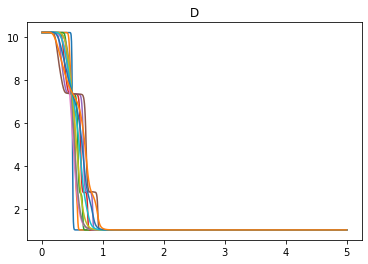

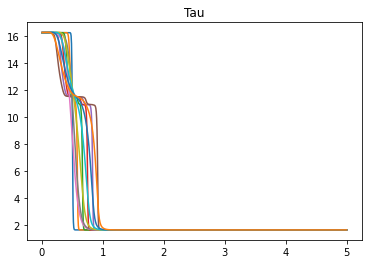

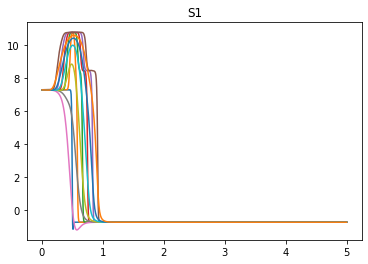

In [41]:
#nslice=fs_IS[0]['Domain'].attrs['ny'][0]//2
for quant in['D','Tau','S1']:
    plt.figure()
    for fs in fss:
        for f in fs:
            #plt.plot(f['Domain/x'], f['Conserved/'+quant][:,nslice,nslice],label=rf"$t=${f.attrs['t'][0]:.2e}")
            plt.plot(f['Domain/x'], f['Conserved/'+quant][:],label=rf"$t=${f.attrs['t'][0]:.2e}")
#         for f in fs_ISCE:
#             #plt.plot(f['Domain/x'], f['Conserved/'+quant][:,nslice,nslice],label=rf"$t=${f.attrs['t'][0]:.2e}")
#             plt.plot(f['Domain/x'], f['Conserved/'+quant][:])#,label=rf"$t=${f.attrs['t'][0]:.2e}")
    plt.title(quant)
    #plt.legend()
    plt.savefig("ComparePlots/Cons_"+quant+".pdf")
    plt.show()


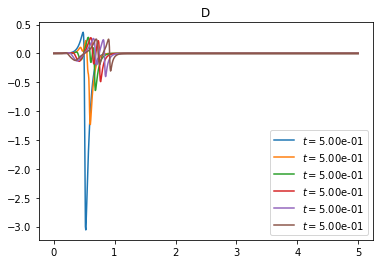

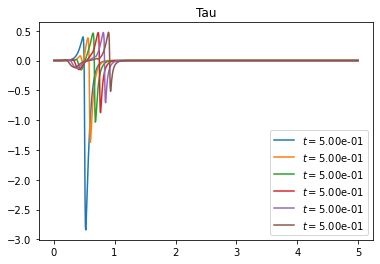

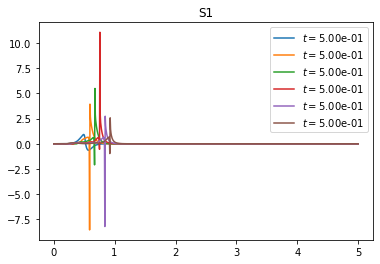

In [42]:
for quant in['D','Tau','S1']:
    plt.figure()
    for n in range(len(fs_IS)):
        #plt.plot(f['Domain/x'], f['Conserved/'+quant][:,nslice,nslice],label=rf"$t=${f.attrs['t'][0]:.2e}")
        plt.plot(fs_IS[n]['Domain/x'][:], (fs_IS[n]['Conserved/'+quant][:] - fs_BDNK[n]['Conserved/'+quant][:])/fs_IS[n]['Conserved/'+quant][:],label=rf"$t=${f.attrs['t'][0]:.2e}")
        plt.title(quant)
    plt.legend()
    plt.savefig("ComparePlots/ConsRelDiff_"+quant+".pdf")
    plt.show()

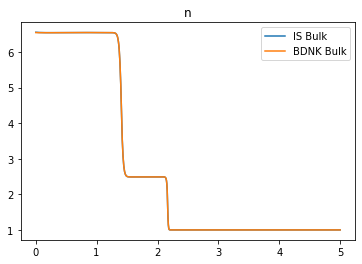

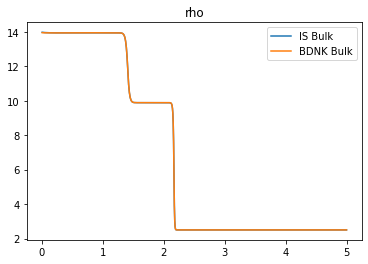

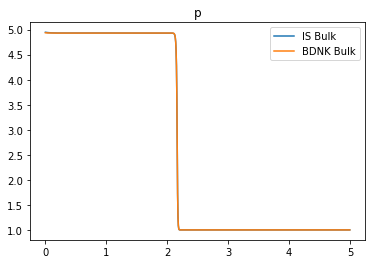

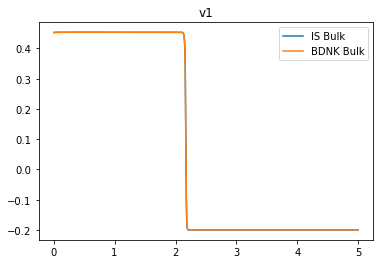

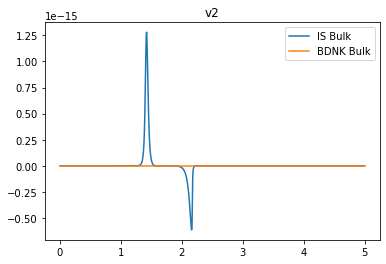

In [65]:
for quant in['n','rho','p','v1','v2']:
    plt.figure()
    for fs, name in zip(fss, names):
        plt.plot(fs[-1]['Domain/x'][:], fs[-1]['Primitive/'+quant][:],label=name)#=rf"$t=${f.attrs['t'][0]:.2e}")
#         plt.plot(fs[-1]['Domain/x'][0:200:1], fs[-1]['Primitive/'+quant][0:200:1],label=name)#=rf"$t=${f.attrs['t'][0]:.2e}")
    plt.title(quant)
    plt.legend()
    plt.savefig("ComparePlots/Prims_"+quant+".pdf")


KeyError: "Unable to open object (object 'Pi' doesn't exist)"

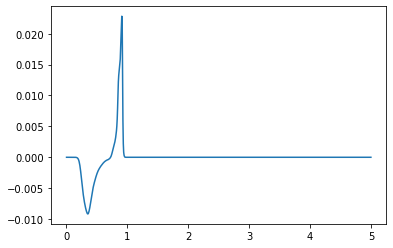

In [44]:
for quant in ['Pi','q1', 'q2', 'pi11', 'pi12']:
    plt.figure()
    plt.plot(fss[0][-1]['Domain/x'], fss[0][-1]['Primitive/'+quant][:],label=names[0])
    plt.plot(fss[1][-1]['Domain/x'], fss[1][-1]['Primitive/'+quant][:],label=names[1])
    plt.plot(fss[2][-1]['Domain/x'], fss[2][-1]['Auxiliary/'+quant][:],label=names[2])
    plt.title(quant+' , '+quant+'NS')
    plt.legend()
    plt.savefig("ComparePlots/Prims_"+quant+".pdf")

In [ ]:
for quant in ['Theta']:
    plt.figure()
    plt.plot(fss[1][-1]['Domain/x'], fss[1][-1]['Auxiliary/'+quant][:],label=quant)
    plt.plot(fss[2][-1]['Domain/x'], fss[2][-1]['Auxiliary/'+quant][:],label=quant)
    plt.title(quant)
    plt.legend()
print(np.allclose(fss[2][-1]['Auxiliary/Theta'][:],0))
print(fss[2][-1]['Auxiliary/Theta'][:])

In [ ]:
for quant in['n','rho','p','v1','v2']:
    plt.figure()
    #for f in fs:
    fIS = fs_IS[-1]
    fISCE = fs_BDNK[-1]
    plt.plot(fIS['Domain/x'], (fIS['Primitive/'+quant][:] - fISCE['Primitive/'+quant][:])/fIS['Primitive/'+quant][:],label=rf"$t=${f.attrs['t'][0]:.2e}")
    plt.title(quant)
    plt.legend()
    plt.savefig("ComparePlots/PrimsRelDiff_"+quant+".pdf")
    plt.show()
    

In [ ]:
# for quant in['Pi','q1', 'q2', 'pi11', 'pi12']:
#     plt.figure()
#     #for f in fs:
#     fIS = fs_IS[-1]
#     fISCE = fs_ISCE[-1]
#     plt.plot(fIS['Domain/x'], (fIS['Primitive/'+quant][:] - fISCE['Auxiliary/'+quant+'NS'][:])/fIS['Primitive/'+quant][:],label=rf"$t=${f.attrs['t'][0]:.2e}")
#     plt.title(quant+' - '+quant+'NS / '+quant)
#     plt.legend()
#     plt.savefig("ComparePlots/PrimsDiff_"+quant+".pdf")
#     plt.show()
    

In [ ]:
for quant in['Pi','q1', 'q2', 'pi11', 'pi12']:
    plt.figure()
    #for f in fs:
    fIS = fs_IS[-1]
    fISCE = fs_BDNK[-1]
    plt.plot(fIS['Domain/x'], (fIS['Primitive/'+quant][:] - fISCE['Auxiliary/'+quant][:]),label=rf"$t=${f.attrs['t'][0]:.2e}")
    plt.title(quant+' - '+quant+'NS')
    plt.legend()
    plt.savefig("ComparePlots/PrimsAbsDiff_"+quant+".pdf")
    plt.show()
    

In [ ]:
for quant in ['T','a1']:
    plt.figure()
    for f in fs_IS:
        #plt.plot(f['Domain/x'], f['Auxiliary/'+quant][:,nslice,nslice],label=rf"$t=${f.attrs['t'][0]:.2e}")
        plt.plot(f['Domain/x'], f['Auxiliary/'+quant][:],label=rf"$t=${f.attrs['t'][0]:.2e}")
    for f in fs_BDNK:
        #plt.plot(f['Domain/x'], f['Auxiliary/'+quant][:,nslice,nslice],label=rf"$t=${f.attrs['t'][0]:.2e}")
        plt.plot(f['Domain/x'], f['Auxiliary/'+quant][:],label=rf"$t=${f.attrs['t'][0]:.2e}")
    plt.title(quant)
    plt.legend()
    plt.savefig("ComparePlots/Aux_"+quant+".pdf")
    plt.show()
